# Hola Juan!

Mi nombre es David Bautista, soy code reviewer de Tripleten y hoy tengo el gusto de revisar tu proyecto.

Cuando vea un error laa primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión.

Encontrarás mis comentarios más abajo - por favor, no los muevas, no los modifiques ni los borres.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

¡Empecemos!

# Descripción del Proyecto

El siguiente proyecto se realiza para una tienda en línea donde en conjunto con el departamento de marketing se ha recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos.

El propósito general es priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.

Se presentan un total de 9 hipótesis, las cuales se priorizan bajo dos criterios ICE y RICE.

Partiendo de los datos obtenidos con la prueba se realizarán diferentes pruebas y análisis comparativos entre los dos grupos que permitan tomar una decisión.

Estas pruebas se realizan comparando los ingresos generados y el número de pedidos por cada uno de los grupos.



<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
   
~~Hola, Juan, sería interesante generar una introducción un poco más extensa para el proyecto.~~ </div>

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
    
David Muchas gracias por observación, amplio un poco más la introducción. 
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
   
Gracias por tener en cuenta la observación Juan, muy buen trabajo.  </div>

## Preparación de los datos

In [1]:
# Cargo todas las librerías
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import ttest_ind
import seaborn as sns
import numpy as np


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
   
Buen trabajo importado las librerías necesarias para el desarrollo del proyecto.  </div>

In [2]:
# Cargo los archivo de datos en DataFrame

hipotesis = pd.read_csv('/datasets/hypotheses_us.csv', sep=";")
ordenes = pd.read_csv('/datasets/orders_us.csv')
visitas = pd.read_csv('/datasets/visits_us.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
   
Buen trabajo cargando los datos necesarios para el desarrollo del proyecto.</div>

**A continuación, se visualizan los datos para una comprensión inicial y se hacen las correcciones pertinentes.**

In [3]:
display(hipotesis.head())
hipotesis.info()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
display(ordenes.head())
ordenes.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [5]:
display(visitas.head())
visitas.info()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
   
Perfecto, muy buen trabajo desarrollando la exploración inicial de los datos.  </div>

### Cambio el tipo de datos acorde con la descripción de cada columna

In [6]:
# Convertir la columna 'date' al formato de fecha 

ordenes['date'] = pd.to_datetime(ordenes['date'], format='%Y-%m-%d')
visitas['date'] = pd.to_datetime(visitas['date'], format='%Y-%m-%d')

In [7]:
# Convertir la columna 'group' al formato de categoria

ordenes['group'] = ordenes['group'].astype('category')
visitas['group'] = visitas['group'].astype('category')
 

In [8]:
# Convertir la columna 'visitorId' al formato objeto
ordenes['visitorId'] = ordenes['visitorId'].astype(object)

In [9]:
ordenes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   object        
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 38.8+ KB


In [10]:
visitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     category      
 2   visits  62 non-null     int64         
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 1.3 KB


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
   
Perfecto, buen trabajo realizando modificaciones a los datos.  </div>

**Se revisa que un usuario no pertenezca a varios grupos a la vez**

In [11]:
# Agrupar los datos por visitorId y group, y contar la cantidad de grupos únicos
recuentos_grupo = ordenes.groupby('visitorId')['group'].nunique().reset_index()

# Filtrar los usuarios que pertenecen a más de un grupo
usuarios_varios_grupos = recuentos_grupo[recuentos_grupo['group'] > 1]

display(usuarios_varios_grupos.head())
usuarios_varios_grupos.info()

,visitorId,group
2,8300375,2
44,199603092,2
51,232979603,2
55,237748145,2
66,276558944,2


<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 2 to 1026
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   visitorId  58 non-null     int64
 1   group      58 non-null     int64
dtypes: int64(2)
memory usage: 1.4 KB


In [12]:
usuario8300375 =  ordenes[ordenes['visitorId'] == 8300375]

display(usuario8300375)

,transactionId,visitorId,date,revenue,group
71,3679129301,8300375,2019-08-01,165.7,B
703,4293855558,8300375,2019-08-07,30.5,A


### Eliminar los usuarios que pertenecen a dos grupos

In [13]:
#crear un nuevo DataFrame que contiene solo las filas de "ordenes" cuyos "visitorId" estén presentes en "usuarios_varios_grupos".
ordenes_filtradas = ordenes.merge(usuarios_varios_grupos, on='visitorId', how='left', indicator=True)

ordenes_filtradas = ordenes_filtradas[ordenes_filtradas['_merge'] == 'left_only']

ordenes_filtradas = ordenes_filtradas.drop(['_merge', 'group_y'], axis=1)

ordenes_filtradas = ordenes_filtradas.rename(columns={"group_x" : "group"})

display(ordenes_filtradas)
ordenes_filtradas.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,255.7,B
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   object        
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   float64       
 4   group          1016 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 40.8+ KB


In [14]:
# rectificar que se eliminaron los usuarios en dos grupos 
recuentos_grupo_1 = ordenes_filtradas.groupby('visitorId')['group'].nunique().reset_index()

display(recuentos_grupo_1['group'].max())


1

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
   
Muy buen trabajo, Juan. Esta sección de identificación y eliminación de los individuos que estaban en los dos grupos es clave para el desarrollo del proyecto.  </div>

### Resumen preparación de los datos

Se revisan nuevamente las bases de datos obtenidas y se hacen las correcciones necesarias para trabajar con ellas en Python, por ejemplo se corrige el tipo de datos de algunas columnas, al no encontrar ningún valor nulo no es necesario hacer modificaciones a ninguna de las bases de datos, pero se encuentra que 58 usuarios pertenecen a los dos grupos, se procede a eliminar estos usuarios de la base de datos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
   
Muy buen trabajo con la sección de preparación de los datos, perfecto Juan. </div>

## Analisis de los datos

### Priorizar hipótesis

#### Aplicar el framework ICE para priorizar hipótesis

In [15]:
hipotesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [16]:
# Calcular ICE
hipotesis['ICE'] = (hipotesis['Confidence'] * hipotesis['Impact']) / hipotesis['Effort']

display(hipotesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,Hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


#### Aplicar el framework RICE para priorizar hipótesis

In [17]:
# Calcular RICE
hipotesis['RICE'] = (hipotesis['Reach'] * hipotesis['Impact'] * hipotesis['Confidence']) / hipotesis['Effort']

display(hipotesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False ))

,Hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


In [18]:
display(hipotesis)

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
   
Muy buen trabajo manejando los datos y aplicando la lógica de los f
Frameworks ``ICE`` y ``RICE``, esplendido trabajo en la sección.  </div>

#### Cambio de la priorización de las hipótesis 

In [19]:
# Ordenar el DataFrame por la columna 'ICE' de mayor a menor
hipotesis_ordenado_ICE = hipotesis.sort_values(by='ICE', ascending=False)

# Ordenar el DataFrame por la columna 'RICE' de mayor a menor
hipotesis_ordenado_RICE = hipotesis.sort_values(by='RICE', ascending=False)

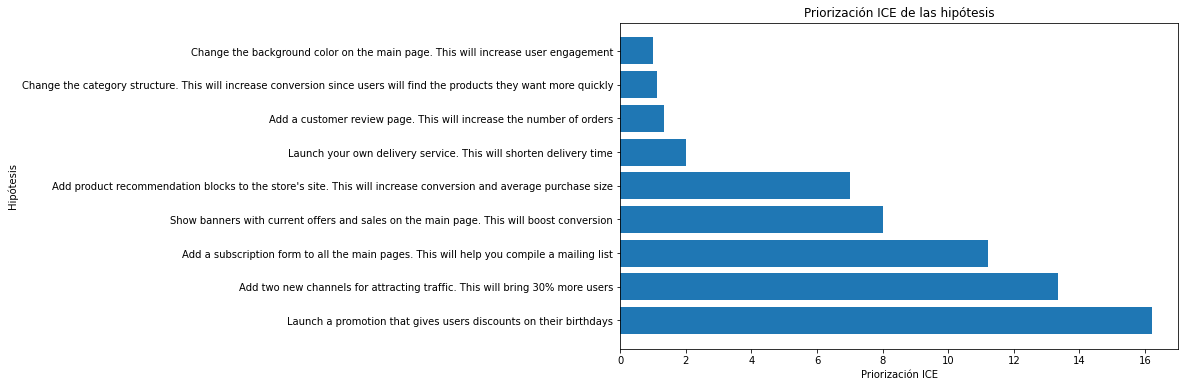

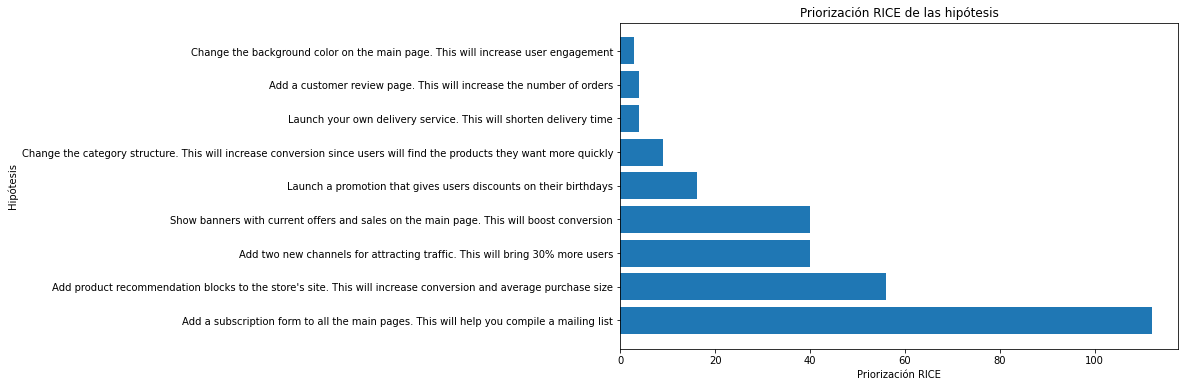

In [20]:
# Graficar el orden de las hipótesis basado en ICE
plt.figure(figsize=(10, 6))
plt.barh(hipotesis_ordenado_ICE['Hypothesis'], hipotesis_ordenado_ICE['ICE'])
plt.xlabel('Priorización ICE')
plt.ylabel('Hipótesis')
plt.title('Priorización ICE de las hipótesis')
plt.show()

# Graficar el orden de las hipótesis basado en RICE
plt.figure(figsize=(10, 6))
plt.barh(hipotesis_ordenado_RICE['Hypothesis'], hipotesis_ordenado_RICE['RICE'])
plt.xlabel('Priorización RICE')
plt.ylabel('Hipótesis')
plt.title('Priorización RICE de las hipótesis')
plt.show()

A partir de la clasificación ICE y RICE las hipótesis planteadas toman diferentes relevancias, ejemplo de esto:
La hipótesis de Lanzar una promoción que ofrezca descuentos a los usuarios es la primera en prioridad partiendo de la clasificación ICE con un puntaje del 16.2, seguida por: Agregue dos nuevos canales para atraer tráfico con 13.3 y Añade un formulario de suscripción a todas las páginas principales con 11.2.

A diferencia con el sistema RICE la hipótesis: Añade un formulario de suscripción a todas las páginas principales. Queda en primer lugar con un puntaje de 112 seguida de, 
Agregar bloques de recomendación de productos a la tienda con 56 puntos, las hipótesis Agregue dos nuevos canales para atraer tráfico y Mostrar banners con ofertas y ventas actuales en la página principal están empatados en el tercer lugar con 40 puntos.

Las diferencias en la priorización se deben a:

ICE: No considera el alcance de las hipótesis.

RICE: Pone mayor énfasis en el alcance y la confianza que en el impacto y el esfuerzo.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
   
Muy buen trabajo con esta sección de análisis adicional de los resultados de los Frameworks ``ICE`` y ``RICE``.  </div>

### Análisis de test A/B

#### Ingreso acumulado por grupo

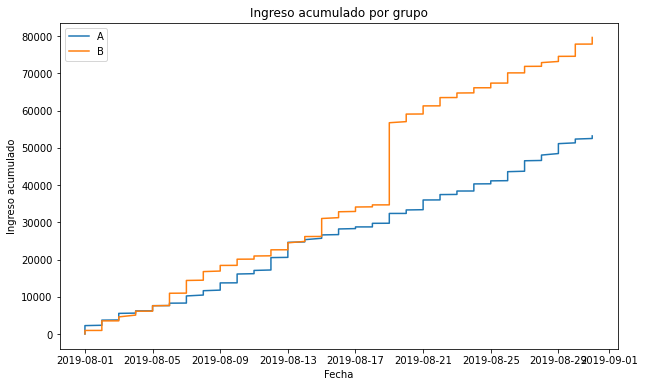

In [21]:
# Ordenar el DataFrame por fecha
ordenes_filtradas = ordenes_filtradas.sort_values(by='date')

# Calcular el ingreso acumulado por grupo
ingreso_acumulado = ordenes_filtradas.groupby('group')['revenue'].cumsum()

# Agregar la columna de ingreso acumulado al DataFrame
ordenes_filtradas['ingreso_acumulado'] = ingreso_acumulado

# Graficar el ingreso acumulado por grupo
plt.figure(figsize=(10, 6))
for group, data in ordenes_filtradas.groupby('group'):
    plt.plot(data['date'], data['ingreso_acumulado'], label=group)
plt.xlabel('Fecha')
plt.ylabel('Ingreso acumulado')
plt.title('Ingreso acumulado por grupo')
plt.legend()
plt.show()

Los ingresos acumulados de los dos grupos tienen un crecimiento paralelo entre los dos y solo se nota diferencia en un día donde en el grupo B se ve un crecimiento inusual, es posible que este día se haya realizado una compra atípica por parte de un usuario perteneciente al grupo B, pero luego de esto los ingresos siguen creciendo de igual manera.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
   
Buen trabajo con el desarrollo de las tablas y gráficos usados para la construcción del esquema que muestra los ingresos acumulados por grupo a lo largo del tiempo.  </div>

#### Tamaño de pedido promedio acumulado por grupo

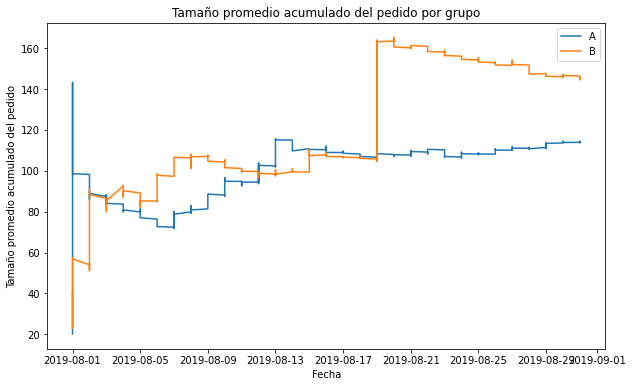

In [22]:
# Calcular el tamaño promedio de pedido acumulado por grupo
tamaño_promedio_acumulado = ordenes_filtradas.groupby('group')['revenue'].expanding().mean().reset_index(level=0, drop=True)

# Agregar la columna del tamaño promedio de pedido acumulado al DataFrame
ordenes_filtradas['tamaño_promedio_acumulado'] = tamaño_promedio_acumulado

# Graficar el tamaño promedio de pedido acumulado por grupo
plt.figure(figsize=(10, 6))
for group, data in ordenes_filtradas.groupby('group'):
    plt.plot(data['date'], data['tamaño_promedio_acumulado'], label=group)
plt.xlabel('Fecha')
plt.ylabel('Tamaño promedio acumulado del pedido')
plt.title('Tamaño promedio acumulado del pedido por grupo')
plt.legend()
plt.show()

Tamaño de pedido promedio acumulado por grupo se comportan de manera similar, con algunas acepciones de donde se notan valores atípicos, pero luego de esto los pedidos vuelven a la normalidad.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
   
Perfecto Juan, buen trabajo con el desarrollo de la gráfica usada para la construcción del esquema que muestra el tamaño promedio acumulado por grupo a lo largo del tiempo.  </div>

#### Tasa de conversión de cada grupo 

In [23]:
# Agrupar los pedidos y visitas por grupo y fecha, y calcular la cantidad de pedidos y visitas para cada grupo en cada día
pedidos_por_grupo_fecha = ordenes_filtradas.groupby(['date', 'group']).size().unstack().fillna(0)
visitas_por_grupo_fecha = visitas.groupby(['date', 'group'])['visits'].sum().unstack().fillna(0)


In [24]:
# Calcular la tasa de conversión dividiendo la cantidad de pedidos por la cantidad de visitas para cada grupo en cada día
tasa_conversion_grupo_A = pedidos_por_grupo_fecha['A'] / visitas_por_grupo_fecha['A']
tasa_conversion_grupo_B = pedidos_por_grupo_fecha['B'] / visitas_por_grupo_fecha['B']


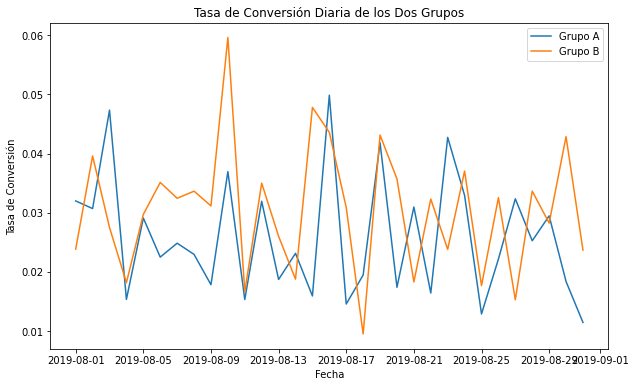

In [25]:
# Graficar las tasas de conversión diarias de los dos grupos
plt.figure(figsize=(10, 6))
plt.plot(tasa_conversion_grupo_A.index, tasa_conversion_grupo_A, label='Grupo A')
plt.plot(tasa_conversion_grupo_B.index, tasa_conversion_grupo_B, label='Grupo B')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Conversión')
plt.title('Tasa de Conversión Diaria de los Dos Grupos')
plt.legend()
plt.show()

Tasa de conversión de los grupos tiene un comportamiento similar a lo largo del tiempo, en algunos días uno es mayor que otro pero al ver la taza de conversión de manera macro podemos decir que no se nota mayor diferencia entre los dos grupos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
   
Perfecto JUan, Buen trabajo con el desarrollo de las tablas y gráficos usados para la construcción del esquema que muestra el tamaño promedio acumulado por grupo a lo largo del tiempo. </div>

#### Número de pedidos por usuario

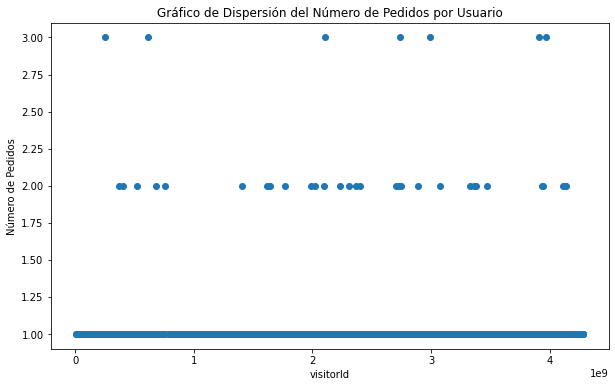

In [26]:
# Agrupar los pedidos por visitorId y contar la cantidad de pedidos para cada usuario
pedidos_por_usuario = ordenes_filtradas.groupby('visitorId').size().reset_index(name='numero_pedidos')

# Graficar un gráfico de dispersión del número de pedidos por usuario
plt.figure(figsize=(10, 6))
plt.scatter(pedidos_por_usuario['visitorId'], pedidos_por_usuario['numero_pedidos'])
plt.xlabel('visitorId')
plt.ylabel('Número de Pedidos')
plt.title('Gráfico de Dispersión del Número de Pedidos por Usuario')
plt.show()

Nuestros usuarios en su mayoría hacen solo un pedido, un porcentaje menor hace dos pedidos y excepcionalmente hacen 3 pedidos.  

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
   
Perfecto, Juan, buen trabajo con el gráfico de dispersión del número de pedidos por usuario.   </div>

#### Percentiles 95 y 99  pedidos por usuario

In [27]:
percentile_95 = pedidos_por_usuario['numero_pedidos'].quantile(0.95)
percentile_99 = pedidos_por_usuario['numero_pedidos'].quantile(0.99)

display("Percentil 95:", percentile_95)
display("Percentil 99:", percentile_99)

'Percentil 95:'

1.0

'Percentil 99:'

2.0

**Solo el 1% del número de pedidos es superior a dos, por lo cual sería una anomalía que un usuario realice dos o más pedidos**

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
   
Perfecto, Juan, buen trabajo con el análisis de los percentiles del numero de pedidos por usuario.  </div>

#### Gráfico de dispersión de los precios de los pedidos

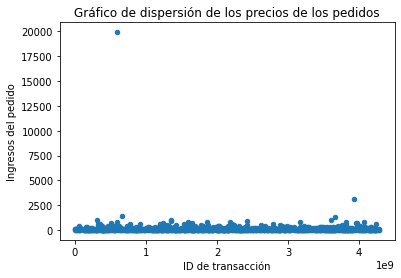

In [28]:
# Trazar el gráfico de dispersión
ordenes_filtradas.plot(kind='scatter', x='transactionId', y='revenue', title='Gráfico de dispersión de los precios de los pedidos')
plt.xlabel('ID de transacción')
plt.ylabel('Ingresos del pedido')

# Mostrar el gráfico
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
   
Buen trabajo con el análisis de la distribución de los precios de los pedidos.</div>

#### Percentiles 95 y 99 de los precios de los pedidos

In [29]:
percentile_95_precio_pedidos = ordenes_filtradas['revenue'].quantile(0.95)
percentile_99_precio_pedidos = ordenes_filtradas['revenue'].quantile(0.99)

display("Percentil 95:", percentile_95_precio_pedidos)
display("Percentil 99:", percentile_99_precio_pedidos)

'Percentil 95:'

414.275

'Percentil 99:'

830.3

**Menos del 1% de los pedidos tienen un precio igual o superior de 830 dólares, por lo cual todo pedido superior a este precio sería un pedido atípico**

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
   
Perfecto, Juan, buen trabajo con el análisis de los percentiles del precio de los pedidos.  </div>

#### Filtrar datos atípicos

In [30]:
# Separar las ordenes por grupos
ordenes_usuarios_A = ordenes[ordenes['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordenes_usuarios_A.columns = ['visitorId', 'orders']

ordenes_usuarios_B = ordenes[ordenes['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordenes_usuarios_B.columns = ['visitorId', 'orders']

# Filtrar los usuarios con mas de 2 pedidos y con pedidos superiores a 830 dolares

usuarios_con_muchas_ordenes = pd.concat([ordenes_usuarios_A[ordenes_usuarios_A['orders'] > 2]['visitorId'], ordenes_usuarios_B[ordenes_usuarios_B['orders'] > 2]['visitorId']], axis = 0)
usuarios_con_pedidos_caros = ordenes[ordenes['revenue'] > 830]['visitorId']
usuarios_anormales = pd.concat([usuarios_con_muchas_ordenes, usuarios_con_pedidos_caros], axis = 0).drop_duplicates().sort_values()

display(usuarios_anormales.head())
display(usuarios_anormales.shape) 

1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
Name: visitorId, dtype: object

(34,)

**Tenemos 34 usuarios anómalos**

#### Significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos brutos

In [31]:
# Calcula la tasa de conversión para cada grupo
conversiones_grupo_A = ordenes_filtradas[ordenes_filtradas['group'] == 'A']['transactionId'].nunique() / ordenes_filtradas[ordenes_filtradas['group'] == 'A']['visitorId'].nunique()
conversiones_grupo_B = ordenes_filtradas[ordenes_filtradas['group'] == 'B']['transactionId'].nunique() / ordenes_filtradas[ordenes_filtradas['group'] == 'B']['visitorId'].nunique()

In [32]:
display(f'la Conversión para el grupo A es: {conversiones_grupo_A}')
display(f'la Conversión para el grupo B es: {conversiones_grupo_B}')

'la Conversión para el grupo A es: 1.051685393258427'

'la Conversión para el grupo B es: 1.0378787878787878'

In [33]:
# Realizar el test de hipótesis para comparar las tasas de conversión entre los grupos
_, p_value = st.ttest_ind(ordenes_filtradas[ordenes_filtradas['group'] == 'A']['revenue'], ordenes_filtradas[ordenes_filtradas['group'] == 'B']['revenue'], equal_var=False)

# Comprobar el valor p para determinar la significancia estadística
if p_value < 0.05:
    print("La diferencia en la conversión entre los grupos es estadísticamente significativa.")
else:
    print("No hay evidencia suficiente para concluir que la diferencia en la conversión entre los grupos es estadísticamente significativa.")

No hay evidencia suficiente para concluir que la diferencia en la conversión entre los grupos es estadísticamente significativa.


#### Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos brutos

In [34]:
# Calcular el tamaño promedio de pedido por grupo
tamaño_promedio_por_grupo = ordenes_filtradas.groupby('group')['revenue'].mean()
display(f'El tamaño promedio de pedido entre los grupos es:')
display(tamaño_promedio_por_grupo)

'El tamaño promedio de pedido entre los grupos es:'

group
A    113.700855
B    145.348905
Name: revenue, dtype: float64

In [35]:
# Realizar el test de hipótesis
grupo_a = ordenes_filtradas[ordenes_filtradas['group'] == 'A']['revenue']
grupo_b = ordenes_filtradas[ordenes_filtradas['group'] == 'B']['revenue']
estadistico, p_valor = ttest_ind(grupo_a, grupo_b, equal_var=False)

# Comprobar el valor p para determinar la significancia estadística
if p_value < 0.05:
    print("Se puede concluir que hay una diferencia significativa en el tamaño promedio de pedido entre los grupos A y B.")
else:
    print("No hay evidencia suficiente para concluir que hay una diferencia significativa en el tamaño promedio de pedido entre los grupos A y B.")

No hay evidencia suficiente para concluir que hay una diferencia significativa en el tamaño promedio de pedido entre los grupos A y B.


#### Significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados

In [36]:
# Filtra los datos para excluir a los usuarios anormales
ordenes_filtradas_filtrado = ordenes_filtradas[~ordenes_filtradas['visitorId'].isin(usuarios_anormales)]

display(ordenes_filtradas_filtrado)


,transactionId,visitorId,date,revenue,group,ingreso_acumulado,tamaño_promedio_acumulado
103,2951399376,2019355024,2019-08-01,40.2,B,40.2,40.200000
148,4238948438,363280180,2019-08-01,5.6,B,45.8,22.900000
97,2012801741,414545763,2019-08-01,90.5,B,136.3,45.433333
143,3433533137,678354126,2019-08-01,100.4,A,306.3,76.575000
142,854120002,544963298,2019-08-01,25.9,B,162.2,40.550000
...,...,...,...,...,...,...,...
957,3759988715,1762249948,2019-08-31,80.5,B,79130.2,144.927106
930,3682739914,3910723394,2019-08-31,300.8,B,79431.0,145.212066
996,1998112401,1900893596,2019-08-31,5.5,A,53166.8,113.847537
1022,2411823395,3788724847,2019-08-31,45.2,A,53212.0,113.700855


In [37]:
# Calcula la tasa de conversión para cada grupo
conversiones_grupo_A_filtrado = ordenes_filtradas_filtrado[ordenes_filtradas_filtrado['group'] == 'A']['transactionId'].nunique() / ordenes_filtradas_filtrado[ordenes_filtradas_filtrado['group'] == 'A']['visitorId'].nunique()
conversiones_grupo_B_filtrado = ordenes_filtradas_filtrado[ordenes_filtradas_filtrado['group'] == 'B']['transactionId'].nunique() / ordenes_filtradas_filtrado[ordenes_filtradas_filtrado['group'] == 'B']['visitorId'].nunique()

In [38]:
display(f'la Conversión para el grupo A filtrado es: {conversiones_grupo_A_filtrado}')
display(f'la Conversión para el grupo B filtrado es: {conversiones_grupo_B_filtrado}')

'la Conversión para el grupo A filtrado es: 1.0300230946882216'

'la Conversión para el grupo B filtrado es: 1.0307101727447217'

In [39]:
# Realizar el test de hipótesis para comparar las tasas de conversión entre los grupos
_, p_value = st.ttest_ind(ordenes_filtradas_filtrado[ordenes_filtradas_filtrado['group'] == 'A']['revenue'], ordenes_filtradas_filtrado[ordenes_filtradas_filtrado['group'] == 'B']['revenue'], equal_var=False)

# Comprobar el valor p para determinar la significancia estadística
if p_value < 0.05:
    print("La diferencia en la conversión entre los grupos es estadísticamente significativa.")
else:
    print("No hay evidencia suficiente para concluir que la diferencia en la conversión entre los grupos filtrados es estadísticamente significativa.")

No hay evidencia suficiente para concluir que la diferencia en la conversión entre los grupos filtrados es estadísticamente significativa.


#### Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados

In [40]:
# Calcular el tamaño promedio de pedido por grupo
tamaño_promedio_por_grupo_filtrado = ordenes_filtradas_filtrado.groupby('group')['revenue'].mean()
display(f'El tamaño promedio de pedido entre los grupos filtrados es:')
display(tamaño_promedio_por_grupo_filtrado)

'El tamaño promedio de pedido entre los grupos filtrados es:'

group
A    99.634529
B    98.253445
Name: revenue, dtype: float64

In [41]:
# Realizar el test de hipótesis
grupo_a_filtrado = ordenes_filtradas_filtrado[ordenes_filtradas_filtrado['group'] == 'A']['revenue']
grupo_b_filtrado = ordenes_filtradas_filtrado[ordenes_filtradas_filtrado['group'] == 'B']['revenue']
estadistico, p_valor = ttest_ind(grupo_a_filtrado, grupo_b_filtrado, equal_var=False)

# Comprobar el valor p para determinar la significancia estadística
if p_value < 0.05:
    print("Se puede concluir que hay una diferencia significativa en el tamaño promedio de pedido entre los grupos A y B filtrados.")
else:
    print("No hay evidencia suficiente para concluir que hay una diferencia significativa en el tamaño promedio de pedido entre los grupos A y B filtrados.")

No hay evidencia suficiente para concluir que hay una diferencia significativa en el tamaño promedio de pedido entre los grupos A y B filtrados.


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
   
~~En general muy buen trabajo con el desarrollo de las secciones de pruebas de hipótesis, lo único adicional interesante de observar sería el comportamiento de las varianzas de los grupos estudiados, lo anterior teniendo en cuenta la importancia de dicho estadístico dentro del planteamiento de la prueba.~~ </div>

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
    
David Muchas gracias por tu observación, a continuación calculo la varianza para los grupos, tanto con los datos filtrados como los datos en bruto.
</div>

#### Varianza de los grupos

In [42]:
# Calcular la varianza para los grupos con los datos en bruto
varianza_por_grupo = ordenes_filtradas.groupby('group')['revenue'].var()
display(varianza_por_grupo)

group
A     29368.402440
B    753820.254313
Name: revenue, dtype: float64

In [43]:
# Calcular la varianza para los grupos con los datos filtrados
varianza_por_grupo_filtrado = ordenes_filtradas_filtrado.groupby('group')['revenue'].var()
display(varianza_por_grupo_filtrado)

group
A    16650.16321
B    16267.45753
Name: revenue, dtype: float64

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
   
Buen trabajo Juan, bien hecho.  </div>

## Conclusiones generales

Se revisan nuevamente las bases de datos obtenidas y se hacen las correcciones necesarias para trabajar con ellas en Python, por ejemplo, se corrige el tipo de datos de algunas columnas, al no encontrar ningún valor nulo no es necesario hacer modificaciones a ninguna de las bases de datos, pero se encuentra que 58 usuarios pertenecen a los dos grupos, se procede a eliminar estos usuarios de la base de datos.

A partir de la clasificación ICE y RICE las hipótesis planteadas toman diferentes relevancias, ejemplo de esto:

La hipótesis de Lanzar una promoción que ofrezca descuentos a los usuarios es la primera en prioridad partiendo de la clasificación ICE con un puntaje del 16.2, seguida por: Agregue dos nuevos canales para atraer tráfico con 13.3 y Añade un formulario de suscripción a todas las páginas principales con 11.2

A diferencia con el sistema RICE la hipótesis: Añade un formulario de suscripción a todas las páginas principales. Queda en primer lugar con un puntaje de 112 seguida de, 
Agregar bloques de recomendación de productos a la tienda con 56 puntos, las hipótesis Agregue dos nuevos canales para atraer tráfico y Mostrar banners con ofertas y ventas actuales en la página principal están empatados en el tercer lugar con 40 puntos.

Los ingresos acumulados de los dos grupos tienen un crecimiento paralelo entre los dos y solo se nota diferencia en un día donde en el grupo B se ve un crecimiento inusual, es posible que este día se haya realizado una compra atípica por parte de un usuario perteneciente al grupo B, pero luego de esto los ingresos siguen creciendo de igual manera.

Tamaño de pedido promedio acumulado por grupo se comportan de manera similar, con algunas acepciones de donde se notan valores atípicos, pero luego de esto los pedidos vuelven a la normalidad.

Tasa de conversión de los grupos tiene un comportamiento similar a lo largo del tiempo, en algunos días uno es mayor que otro, pero al ver la taza de conversión de manera macro podemos decir que no se nota mayor diferencia entre los dos grupos.

Nuestros usuarios en su mayoría hacen solo un pedido, un porcentaje menor hace dos pedidos y excepcionalmente hacen 3 pedidos.

Solo el 1% del número de pedidos es superior a dos, por lo cual sería una anomalía que un usuario realice dos o más pedidos.

Menos del 1% de los pedidos tienen un precio igual o superior de 830 dólares, por lo cual todo pedido superior a este precio sería un pedido atípico.

A partir de lo anterior se filtra la base de datos para encontrar los usuarios atípicos que realicen mas de dos pedidos y/o pedidos con un valor igual o superior a 830 dólares, lo cual da como resultado un total de 34 usuarios atípicos.

Al calcular la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos brutos encontramos que: 
-	la Conversión para el grupo A es: 1.05
-	la Conversión para el grupo B es: 1.04

este mismo calculo, para los datos filtrados es:
-	la Conversión para el grupo A filtrado es: 1.03
-	la Conversión para el grupo B filtrado es: 1.031

La significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos sin filtrar y los grupos con datos filtrados nos muestra que: No hay evidencia suficiente para concluir que hay una diferencia significativa en el tamaño promedio de pedido entre los grupos A y B. Aunque se llegue a la misma conclusión los números si cambian debido que:

El tamaño promedio de pedido entre los grupos filtrados es:
A    99.634529
B    98.253445

Diferente a los datos en bruto que El tamaño promedio de pedido entre los grupos es:
A    113.700855
B    145.348905

Con todo lo anterior podemos decir que:

**Para la prueba, concluye que no hay diferencia entre los grupos.**


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
   
Muy buen trabajo, más allá del código de calidad que realizas, te esforzaste desarrollando una sección de conclusiones, coherentes, y con un muy buen contenido.  </div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
# Comentario General
    
~~Hola, Juan, te felicito por el excelente desarrollo del proyecto hasta el momento. Ahora bien, he dejado unos pequeños comentarios para que los puedas tener en cuenta para la siguiente entrega. ~~
     </div>

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
    
David Muchas gracias por tu revisión 
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
# Comentario General #2
    
Hola, Juan, gracias por tener en cuenta mis comentarios. Te felicito por la culminación del proyecto. Muy buen trabajo.  </div>